In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline
plt.style.available
plt.style.use('ggplot')# fivethirtyeight

In [5]:
%ls

HIIndustrialSolver/
OSIRIS/
coding/
config_files/
examples_gurobi/
examples_localsolver/
examples_ortools/
examples_pyomo/
gams/
notebooks/
opthimus-base/
opthimus-base-interface/
opthimus-logistic-solver/
opthimus-routing-solver/
opthimus-routing-solver-interface/
opthimus-sequencer/
opthimus-sequencer-interface/
opthimus-stock-optimization/
opthimus-warehouse-solver/
opthimus-warehouse-solver-interface/
optimization_module_example/
projects-HI/
projects-others/
projects-repsol/
pyomo-assesment/
pyomo_bootcamp-python-optimization-from-Beginner-to-Advance/
simpy_examples/
sql/
tests/


In [6]:
%cd notebooks

/Users/joseangelvelasco/PycharmProjects/notebooks


In [7]:
data_file = 'data/tabernas_meteo_data.csv'
df = pd.read_csv(data_file, sep= ';')
df.head()

,FECHA,Al04TMax,Al04TMin,Al04TMed,Al04Precip
0,31-12-15,17.9,2.0,9.6,0.0
1,30-12-15,20.0,3.0,10.4,0.2
2,29-12-15,18.7,3.6,10.1,0.0
3,29-12-15,18.7,3.4,9.7,0.0
4,28-12-15,17.7,4.6,10.4,0.0


In [8]:
df.tail()

,FECHA,Al04TMax,Al04TMin,Al04TMed,Al04Precip
5471,05-01-01,20.5,6.5,13.5,0.0
5472,04-01-01,19.7,6.9,13.0,0.0
5473,03-01-01,15.8,2.6,9.3,0.0
5474,02-01-01,16.7,8.8,13.2,0.0
5475,01-01-01,17.9,2.0,9.6,0.0


In [9]:
df.describe()

,Al04TMax,Al04TMin,Al04TMed,Al04Precip
count,5476.000000,5476.000000,5476.000000,5476.000000
mean,23.235610,9.802264,16.359916,0.680734
std,7.394561,6.250901,6.687243,3.364680
min,0.000000,-8.200000,-14.900000,0.000000
25%,17.200000,4.700000,10.600000,0.000000
50%,22.900000,9.700000,16.100000,0.000000
75%,29.300000,15.200000,22.200000,0.000000
max,42.600000,26.000000,32.100000,66.200000


In [10]:
df['FECHA'] = pd.to_datetime(df['FECHA'], format='%d-%m-%y')
df.sort_values(by=['FECHA'])

,FECHA,Al04TMax,Al04TMin,Al04TMed,Al04Precip
5475,2001-01-01,17.9,2.0,9.6,0.0
5474,2001-01-02,16.7,8.8,13.2,0.0
5473,2001-01-03,15.8,2.6,9.3,0.0
5472,2001-01-04,19.7,6.9,13.0,0.0
5471,2001-01-05,20.5,6.5,13.5,0.0
...,...,...,...,...,...
4,2015-12-28,17.7,4.6,10.4,0.0
3,2015-12-29,18.7,3.4,9.7,0.0
2,2015-12-29,18.7,3.6,10.1,0.0
1,2015-12-30,20.0,3.0,10.4,0.2


In [11]:
df.head()

,FECHA,Al04TMax,Al04TMin,Al04TMed,Al04Precip
0,2015-12-31,17.9,2.0,9.6,0.0
1,2015-12-30,20.0,3.0,10.4,0.2
2,2015-12-29,18.7,3.6,10.1,0.0
3,2015-12-29,18.7,3.4,9.7,0.0
4,2015-12-28,17.7,4.6,10.4,0.0


In [12]:
df.tail()

,FECHA,Al04TMax,Al04TMin,Al04TMed,Al04Precip
5471,2001-01-05,20.5,6.5,13.5,0.0
5472,2001-01-04,19.7,6.9,13.0,0.0
5473,2001-01-03,15.8,2.6,9.3,0.0
5474,2001-01-02,16.7,8.8,13.2,0.0
5475,2001-01-01,17.9,2.0,9.6,0.0


In [13]:
df['MONTH'] = df['FECHA'].dt.month
df['YEAR'] = df['FECHA'].dt.year
df['DAY'] = df['FECHA'].dt.day

In [14]:
df.head()

,FECHA,Al04TMax,Al04TMin,Al04TMed,Al04Precip,MONTH,YEAR,DAY
0,2015-12-31,17.9,2.0,9.6,0.0,12,2015,31
1,2015-12-30,20.0,3.0,10.4,0.2,12,2015,30
2,2015-12-29,18.7,3.6,10.1,0.0,12,2015,29
3,2015-12-29,18.7,3.4,9.7,0.0,12,2015,29
4,2015-12-28,17.7,4.6,10.4,0.0,12,2015,28


In [15]:
df.tail()

,FECHA,Al04TMax,Al04TMin,Al04TMed,Al04Precip,MONTH,YEAR,DAY
5471,2001-01-05,20.5,6.5,13.5,0.0,1,2001,5
5472,2001-01-04,19.7,6.9,13.0,0.0,1,2001,4
5473,2001-01-03,15.8,2.6,9.3,0.0,1,2001,3
5474,2001-01-02,16.7,8.8,13.2,0.0,1,2001,2
5475,2001-01-01,17.9,2.0,9.6,0.0,1,2001,1


In [16]:
df.columns

Index(['FECHA', 'Al04TMax', 'Al04TMin', 'Al04TMed', 'Al04Precip ', 'MONTH',
       'YEAR', 'DAY'],
      dtype='object')

In [17]:
dfg = df.groupby(['YEAR', 'MONTH']).agg({'Al04TMax':'max', 'Al04TMed':'mean', 'Al04TMin':'min'}).reset_index()
dfg.rename(columns={'Al04TMax':'t_max', 'Al04TMed':'t_med', 'Al04TMin':'t_min'}, inplace=True)
dfg.head()

,YEAR,MONTH,t_max,t_med,t_min
0,2001,1,21.8,10.238710,-2.2
1,2001,2,22.5,10.264286,1.1
2,2001,3,32.0,15.629032,2.8
3,2001,4,28.6,15.576667,4.0
4,2001,5,31.3,17.754839,5.3


In [18]:
dfg.tail()

,YEAR,MONTH,t_max,t_med,t_min
175,2015,8,37.0,25.383871,15.1
176,2015,9,34.0,21.226667,10.8
177,2015,10,32.8,17.454839,7.5
178,2015,11,23.5,12.563333,-1.4
179,2015,12,23.8,10.484375,1.9


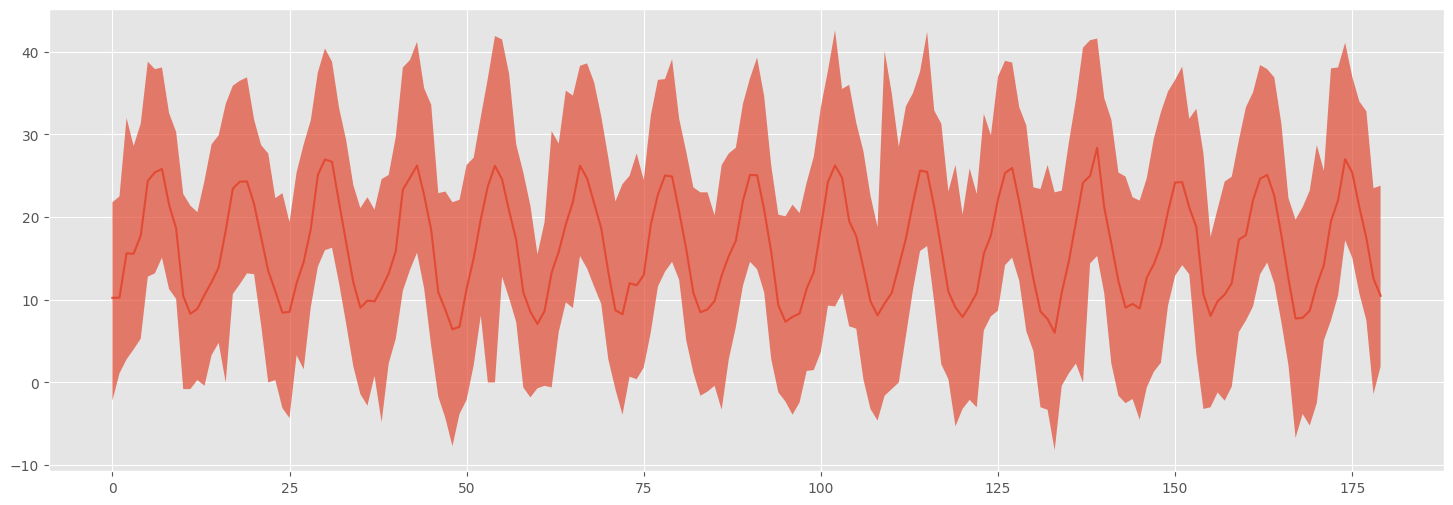

In [19]:
days = np.arange(0, len(dfg))

plt.figure(figsize=(18,6))
plt.fill_between(days, dfg['t_max'],dfg['t_min'], alpha=0.7)
plt.plot(days, dfg['t_med'])
plt.show()
#plt.xlim(1, 365)

In [20]:
dfg2 = df.groupby(['MONTH','DAY']).agg({'Al04TMax':'max', 'Al04TMed':'mean', 'Al04TMin':'min'}).reset_index()
dfg2.rename(columns={'Al04TMax':'t_max', 'Al04TMed':'t_med', 'Al04TMin':'t_min'}, inplace=True)
dfg2.head()

,MONTH,DAY,t_max,t_med,t_min
0,1,1,21.0,9.226667,-1.6
1,1,2,22.9,9.253333,-3.0
2,1,3,21.4,8.526667,-1.6
3,1,4,21.4,8.653333,-0.6
4,1,5,21.7,8.740000,-1.0


In [21]:
dfg2.tail()

,MONTH,DAY,t_max,t_med,t_min
360,12,27,17.5,7.846667,-2.6
361,12,28,19.3,8.100000,-4.3
362,12,29,22.6,8.037500,-3.2
363,12,30,20.8,8.540000,-6.7
364,12,31,20.7,8.560000,-5.9


In [22]:
iqr = dfg2['t_max'].quantile(0.75) - dfg2['t_max'].quantile(0.25)

In [23]:
dfg2['t_q1'] =  dfg2['t_min'] - 1.5*iqr
dfg2['t_q3'] = dfg2['t_max'] + 1.5*iqr

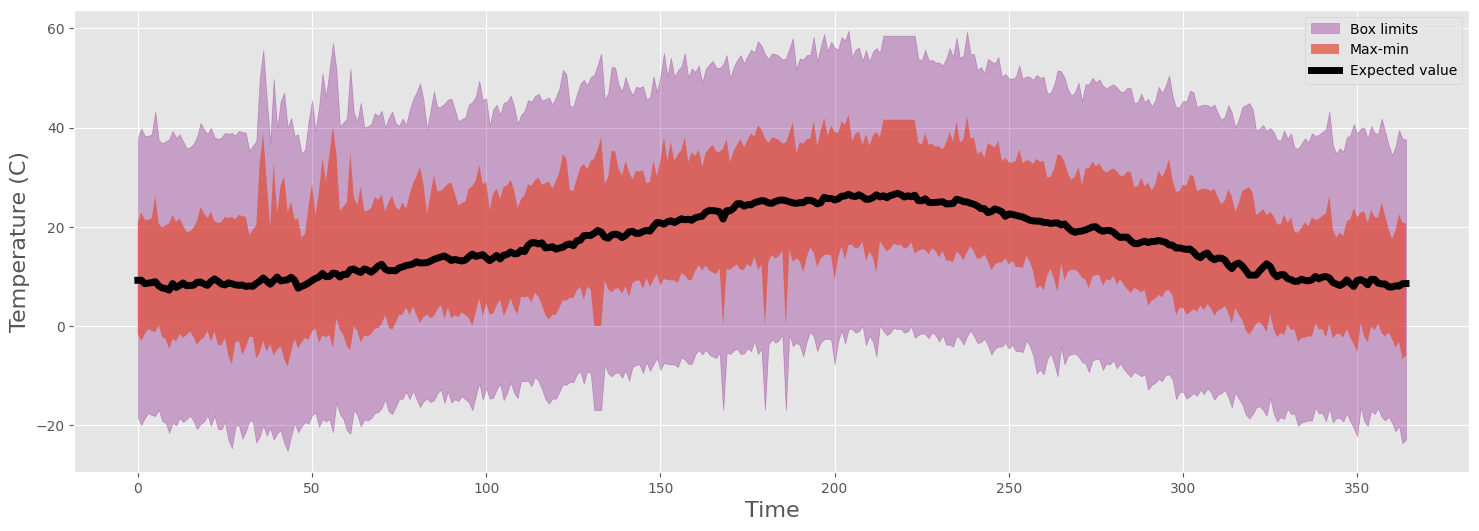

In [24]:
days = np.arange(0, len(dfg2))

plt.figure(figsize=(18,6))
plt.fill_between(days, dfg2['t_q1'], dfg2['t_q3'], alpha=0.3, color='purple', label='Box limits')
plt.fill_between(days, dfg2['t_max'], dfg2['t_min'], alpha=0.7, label='Max-min')
plt.plot(days, dfg2['t_med'], lw=5, color='k', label='Expected value')
plt.legend()
plt.xlabel('Time', fontsize=16)
plt.ylabel('Temperature (C)', fontsize=16)
plt.show()

#plt.xlim(1, 365)

## 2D plots

# Function 1

\begin{equation}
z \equiv f(x,y) \doteq \sin{\left(\sqrt{x^2 + y^2}\right)}
\end{equation}

In [25]:
#we will use numpy functions in order to work with numpy arrays
def funcion(x,y):
    z  = np.sin(np.sqrt(x**2 + y**2))
    return z

In [26]:
n = 100
x = np.random.uniform(-5, 5, n)
y = np.random.uniform(-5, 5, n)
z = funcion(x, y)

#we create two 1D arrays of the desired lengths:
x_1d = np.linspace(min(x), max(x), n)
y_1d = np.linspace(min(y), max(y), n)

#And we use the meshgrid function to create the X and Y matrices!
X, Y = np.meshgrid(x_1d, y_1d)

#Using Numpy arrays, calculating the function value at the points is easy!
Z = funcion(X,Y)

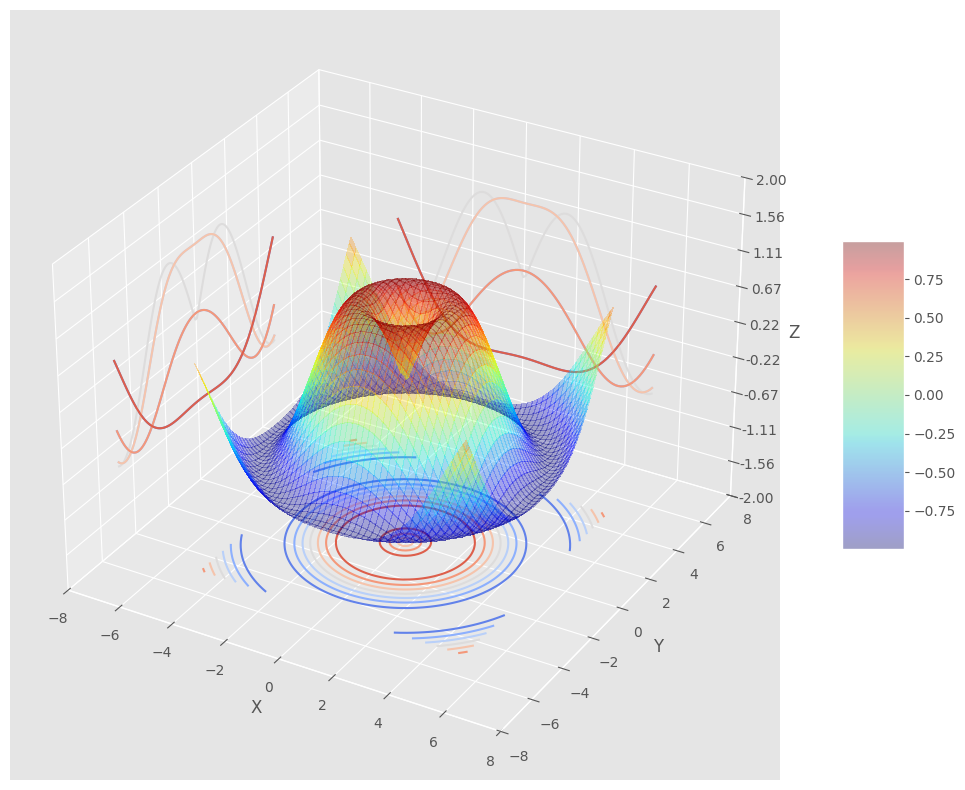

In [27]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.3, cmap=cm.jet, # coolwarm
                       linewidth=0, antialiased=False)
# Customize the z axis.
#ax.set_zlim(-120, 120)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# add contour 
cset = ax.contour(X, Y, Z, zdir='z', offset=-2, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-8, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=8, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-8, 8)
ax.set_ylabel('Y')
ax.set_ylim(-8, 8)
ax.set_zlabel('Z')
ax.set_zlim(-2, 2)



# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.4, aspect=5)
plt.show()

In [28]:
#we will use numpy functions in order to work with numpy arrays
def rosembrock(x,y):
    z  = (1-x)**2+100*(y-x**2)**2
    return z

n = 100
x = np.random.uniform(-1, 1, n)
y = np.random.uniform(-1, 1, n)
z = rosembrock(x, y)

#we create two 1D arrays of the desired lengths:
x_1d = np.linspace(min(x), max(x), n)
y_1d = np.linspace(min(y), max(y), n)

#And we use the meshgrid function to create the X and Y matrices!
X, Y = np.meshgrid(x_1d, y_1d)

#Using Numpy arrays, calculating the function value at the points is easy!
Z = rosembrock(X,Y)

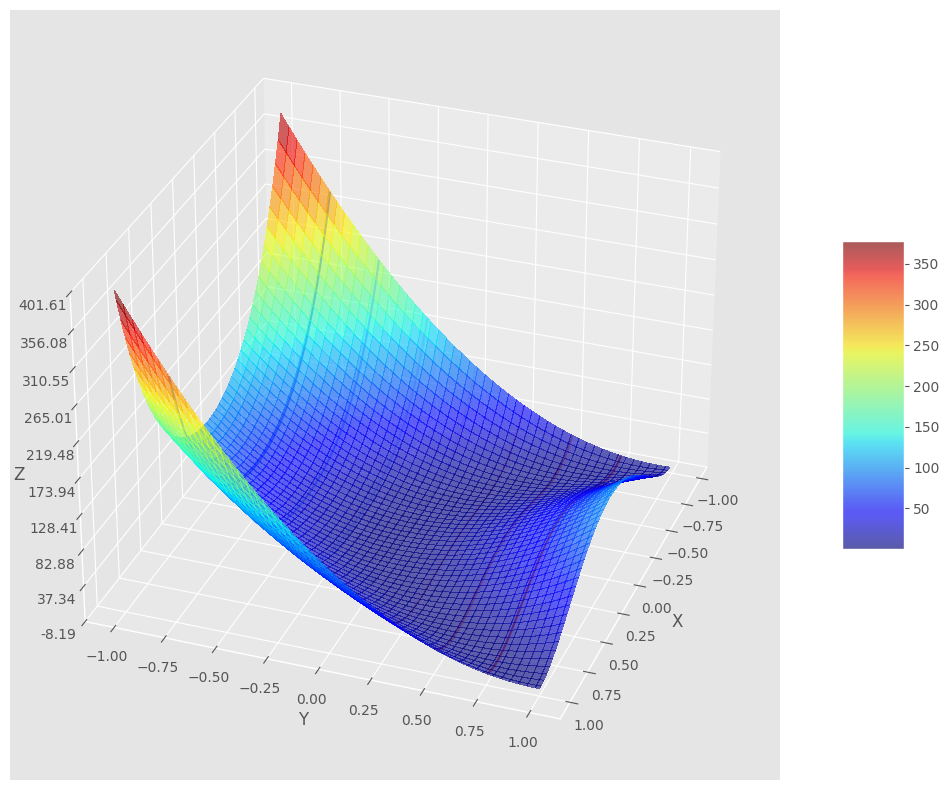

In [29]:

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z,
                       rstride=2,
                       cstride=2,
                       alpha=0.6,
                       cmap=cm.jet,
                       linewidth=0,
                       antialiased=False)
# Customize the z axis.
#ax.set_zlim(-120, 120)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# add contour 
cset = ax.contour(X, Y, Z, zdir='y', cmap=cm.coolwarm)

ax.set_xlabel('X')
#ax.set_xlim(-8, 8)
ax.set_ylabel('Y')
#ax.set_ylim(-8, 8)
ax.set_zlabel('Z')
#ax.set_zlim(-2, 2)

ax.view_init(30, 20)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.4, aspect=5)
plt.show()

Text(0, 0.5, 'Y')

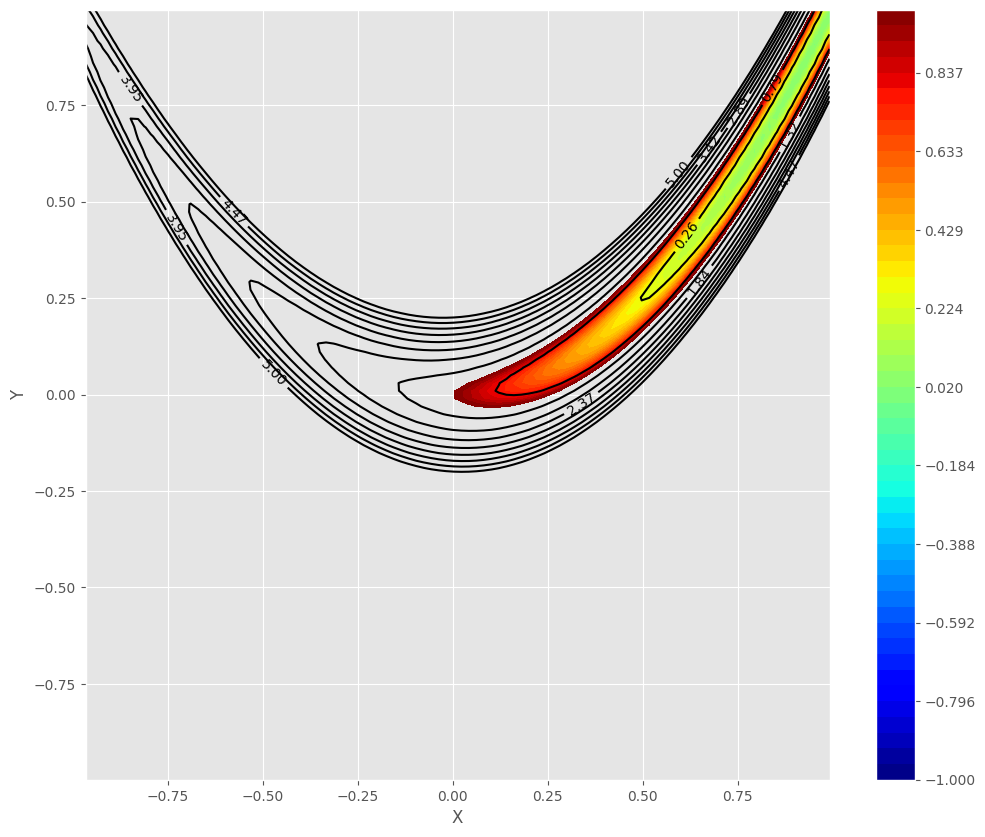

In [33]:
#We can even combine them!
plt.figure(figsize=(12,10))
levels = np.linspace(-1, 1, 50)
plt.contourf(X, Y, Z, levels, cmap=cm.jet)
plt.colorbar()
# add level curves
levels = np.linspace(-5, 5, 20)
cs = plt.contour(X, Y, Z, levels, colors='k')
plt.clabel(cs)
plt.xlabel('X')
plt.ylabel('Y')

# Funtion 2

\begin{equation}
z \equiv  f(x,y) \doteq  \left(y^3 -1\right)\cdot \cos(x)
\end{equation}

In [34]:
#we will use numpy functions in order to work with numpy arrays
def funcion(x,y):
    z  = (y**3-1)*np.cos(x)
    return z

In [35]:
n = 100
x = np.random.uniform(-5, 5, n)
y = np.random.uniform(-5, 5, n)
z = funcion(x, y)

#we create two 1D arrays of the desired lengths:
x_1d = np.linspace(min(x), max(x), n)
y_1d = np.linspace(min(y), max(y), n)

#And we use the meshgrid function to create the X and Y matrices!
X, Y = np.meshgrid(x_1d, y_1d)

#Using Numpy arrays, calculating the function value at the points is easy!
Z = funcion(X,Y)

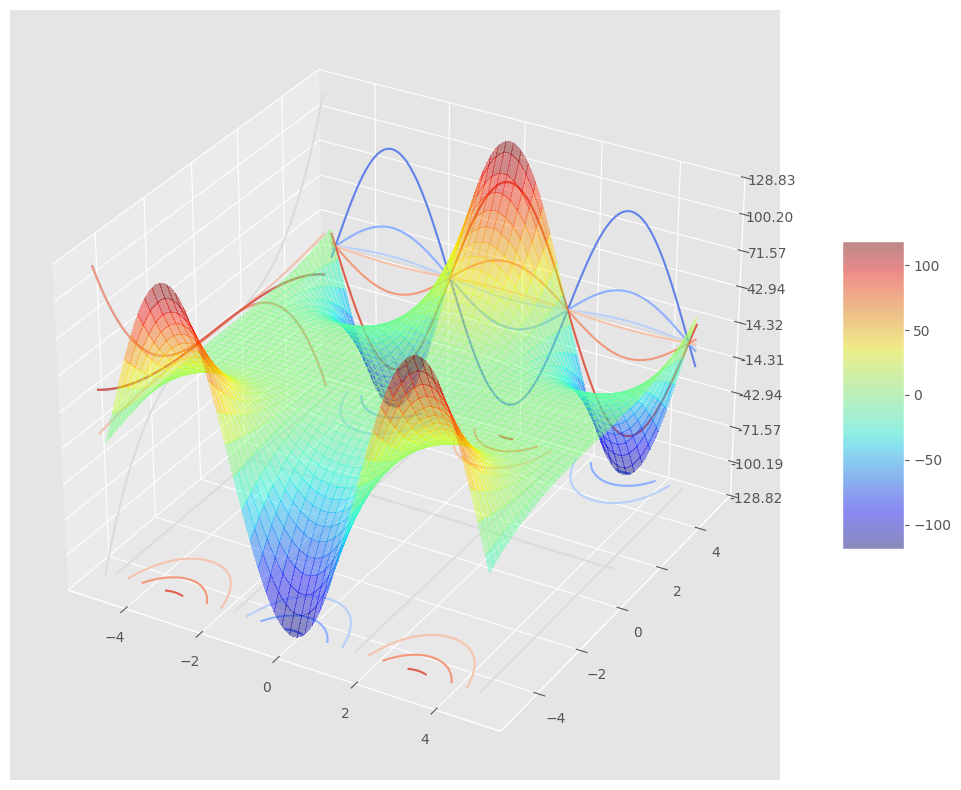

In [36]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.4, cmap=cm.jet, # coolwarm
                       linewidth=0, antialiased=False)
# Customize the z axis.
#ax.set_zlim(-120, 120)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# add contour 
cset = ax.contour(X, Y, Z, zdir='z', offset=-120, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-5, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=5, cmap=cm.coolwarm)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.4, aspect=5)
plt.show()

In [37]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.8, cmap=cm.jet)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-150,  alpha=0.2, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-8, alpha=0.2, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=8, alpha=0.2, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-8, 8)
ax.set_ylabel('Y')
ax.set_ylim(-8, 8)
ax.set_zlabel('Z')
ax.set_zlim(-150, 150)

fig.colorbar(surf, shrink=0.4, aspect=5)

plt.show()

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 2000x1000 with 0 Axes>

In [38]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.2, cmap=cm.jet)

cset = ax.contourf(X, Y, Z, zdir='y', offset=8, alpha=0.8, cmap=cm.jet)

ax.set_xlabel('X')
ax.set_xlim(-8, 8)
ax.set_ylabel('Y')
ax.set_ylim(-8, 8)
ax.set_zlabel('Z')
ax.set_zlim(-150, 150)


fig.colorbar(surf, shrink=0.4, aspect=5)

plt.show()

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 2000x1000 with 0 Axes>

Text(0, 0.5, 'Y')

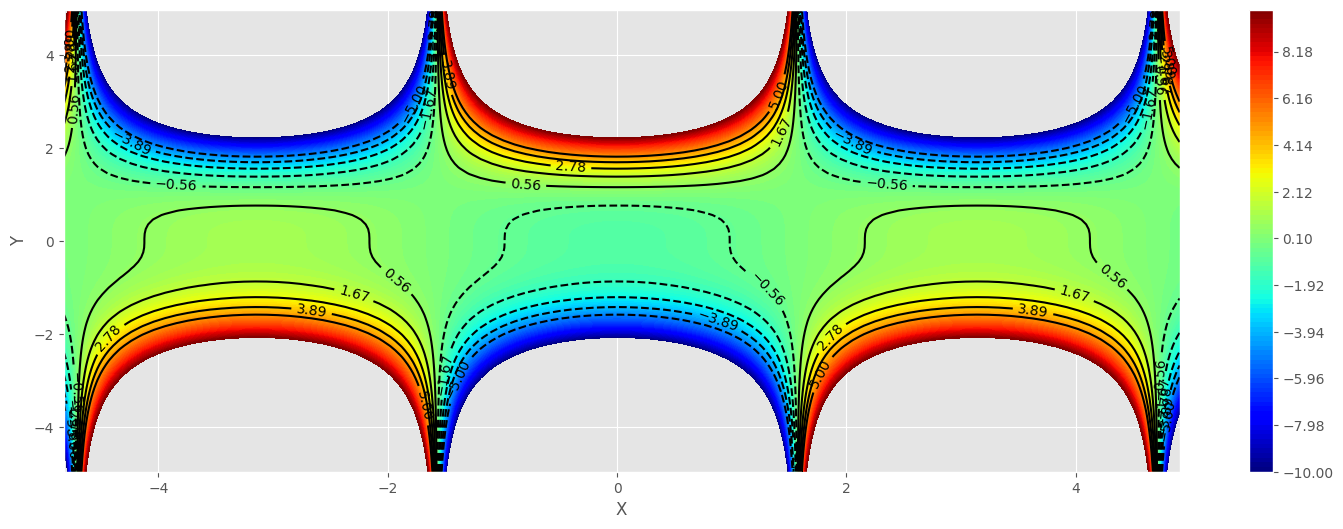

In [39]:
#We can even combine them!
plt.figure(figsize=(18,6))
levels = np.linspace(-10, 10, 100)
plt.contourf(X, Y, Z, levels, cmap=cm.jet)
plt.colorbar()
# add level curves
levels = np.linspace(-5, 5, 10)
cs = plt.contour(X, Y, Z, levels, colors='k')
plt.clabel(cs)
plt.xlabel('X')
plt.ylabel('Y')

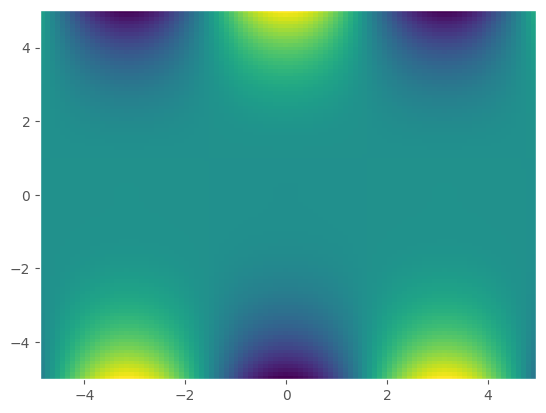

In [40]:
fig, ax = plt.subplots()
ax.pcolormesh(X, Y, Z)

/var/folders/hf/qyngjlq15hd8hc98ppft015m0000gn/T/ipykernel_54809/2743058712.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  cs = ax.pcolormesh(Z, X, Y, cmap=cm.jet, shading='auto')


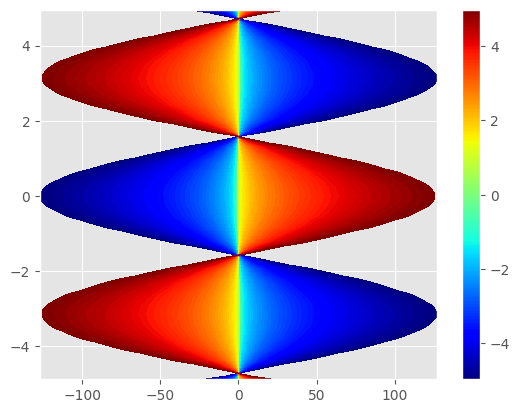

In [41]:
fig, ax = plt.subplots()
cs = ax.pcolormesh(Z, X, Y, cmap=cm.jet, shading='auto')
plt.colorbar(cs)